# Generate FWE Corrected R-Squared Map 
- Using maximum statistic correction
- Notes on controlling a regression:
    - Adding covariates to a regression will 'control' for them, but will almost always increase the R-squared. 
    - To 'remove' a covariate from the regression, you will want to regress a nuisance covariate OUT of the covariate of interest. 
        - This means your regressor will become the residuals from the regression of cov_1 ~ nuisance_cov1

Import Niftis
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the covarite DF column names below
- Column labels are subject IDs. 
- This is expected to ultimately have the form:

|        |  1 |  2 |  3 |  4 |  5 |  6 |  7 |  8 |  9 |  10 | ... |  40 |  41 |  42 |  43 |  45 |  46 |  47 |  48 |  49 |  50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Voxel 1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| . . .      | ...         | ...        | ...         | ...         | ...         | ...         | ...         | ...         | ...         | ...          | ... | ...           | ...           | ...           | ...           | ...           | ...           | 7           | ...           | ...           | ...           |
| Voxel N     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |

In [1]:
import_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/SeedsYeo'
file_target = '*'
file_column = None

In [2]:
from calvin_utils.file_utils.import_functions import GiiNiiFileImport
giinii = GiiNiiFileImport(import_path=import_path, file_column=file_column, file_pattern=file_target)
nimg_df = giinii.run()
nimg_df

/usr/local/Caskroom/mambaforge/base/envs/nimlab_py310/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Attempting to import from: /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/SeedsYeo/*


,Jin2016Hippocampus_combined_func_seed_AvgR_Fz.nii,Velasco1987Cm_combined_func_seed_AvgR_Fz.nii,Hodaie2002Ant_combined_func_seed_AvgR_Fz.nii,Curkiet2020Hippocampus_combined_func_seed_AvgR_Fz.nii,Herrman2018Ant_combined_func_seed_AvgR_Fz.nii,Yan2023Pulvinar_combined_func_seed_AvgR_Fz.nii,VilelaFilho2023LGN_R_func_seed_AvgR_Fz.nii,Krishna2016Ant_combined_func_seed_AvgR_Fz.nii,Cukiert2009Cm_combined_func_seed_AvgR_Fz.nii,Velasco2007Hippocampus_combined_func_seed_AvgR_Fz.nii,...,Valentin2013Cm_combined_func_seed_AvgR_Fz.nii,Osorio2007Ant_combined_func_seed_AvgR_Fz.nii,Sitnikov2018Ant_combined_func_seed_AvgR_Fz.nii,BenedettiIsaac2015pHyp_combined_func_seed_AvgR_Fz.nii,Boon2007Hippocampus_combined_func_seed_AvgR_Fz.nii,JinLee2012Ant_combined_func_seed_AvgR_Fz.nii,Agashe2022Cm_combined_func_seed_AvgR_Fz.nii,Cui2023Stn_combined_func_seed_AvgR_Fz.nii,Warren2022Cm_combined_func_seed_AvgR_Fz.nii,Tassigny2020Ant_combined_func_seed_AvgR_Fz.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fix names

In [3]:
pre = ''
post = '_vat_seed'

In [4]:
nimg_df = GiiNiiFileImport.splice_colnames(nimg_df, pre, post)
nimg_df

,Jin2016Hippocampus_combined_func_seed_AvgR_Fz.nii,Velasco1987Cm_combined_func_seed_AvgR_Fz.nii,Hodaie2002Ant_combined_func_seed_AvgR_Fz.nii,Curkiet2020Hippocampus_combined_func_seed_AvgR_Fz.nii,Herrman2018Ant_combined_func_seed_AvgR_Fz.nii,Yan2023Pulvinar_combined_func_seed_AvgR_Fz.nii,VilelaFilho2023LGN_R_func_seed_AvgR_Fz.nii,Krishna2016Ant_combined_func_seed_AvgR_Fz.nii,Cukiert2009Cm_combined_func_seed_AvgR_Fz.nii,Velasco2007Hippocampus_combined_func_seed_AvgR_Fz.nii,...,Valentin2013Cm_combined_func_seed_AvgR_Fz.nii,Osorio2007Ant_combined_func_seed_AvgR_Fz.nii,Sitnikov2018Ant_combined_func_seed_AvgR_Fz.nii,BenedettiIsaac2015pHyp_combined_func_seed_AvgR_Fz.nii,Boon2007Hippocampus_combined_func_seed_AvgR_Fz.nii,JinLee2012Ant_combined_func_seed_AvgR_Fz.nii,Agashe2022Cm_combined_func_seed_AvgR_Fz.nii,Cui2023Stn_combined_func_seed_AvgR_Fz.nii,Warren2022Cm_combined_func_seed_AvgR_Fz.nii,Tassigny2020Ant_combined_func_seed_AvgR_Fz.nii
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
902624,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902625,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902626,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
902627,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Import Covariates
- These are EXPECTED to have subject IDs which are IDENTICAL to the subject IDs that go in the neuroimaging DF column names above
- Do NOT enter strings for categorical variables. All data must be numerical
- If you need to standardize or otherwise change you data, do it elsewhere first. 

|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [5]:
# input_csv_path = '/Users/cu135/Dropbox (Partners HealthCare)/studies/atrophy_seeds_2023/metadata/atrophy_roi_scores/master_list_z6_only_unthresholded.csv'
input_csv_path = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/master_list.csv'
sheet=None

Where do you want to save your data

In [6]:
out_dir = '/Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/rho_map/voxelwise'

In [7]:
from calvin_utils.permutation_analysis_utils.statsmodels_palm import CalvinStatsmodelsPalm
# Instantiate the PalmPrepararation class
cal_palm = CalvinStatsmodelsPalm(input_csv_path=input_csv_path, output_dir=out_dir, sheet=sheet)
# Call the process_nifti_paths method
data_df = cal_palm.read_and_display_data()

,sub_id,subject,RoiNiftiPaths,Target,N,Outcome,StandardDeviation,CertaintyWeight,Generalized,Focal,Multifocal,Multiple,ResponderOrNot,nifti_paths,right_voxel_value,left_voxel_value,outcome_to_voxel_peak,Epilepsy_Type,OrdinalEpilepsyType,OrdinalTargetType
0,1,Agashe2022Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,1,0.9700,0.00,1.000000,1,0,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.018946,0.018946,0.001948,Generalized,1,5
1,2,AlcalaZermeno2020Ant_combined_func_seed_AvgR_F...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,11,0.5543,39.25,9.877041,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.012305,0.012305,0.017092,Multiple,4,1
2,3,AlcalaZermeno2020Cm_combined_func_seed_AvgR_Fz...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,5,0.4378,37.00,4.762578,0,0,0,1,0,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.132304,-0.132304,0.018832,Multiple,4,5
3,54,Benabid2002Stn_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Stn,1,0.8000,0.00,1.000000,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.026190,-0.026190,0.003703,Focal,2,4
4,53,BenedettiIsaac2015pHyp_combined_func_seed_AvgR...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,pHyp,9,0.8774,20.90,15.176445,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.012185,0.012185,-0.016686,Multiple,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,65,Yan2023Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,3,0.7023,16.13,6.554819,1,0,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.021837,-0.021837,0.009114,Generalized,1,5
64,66,Yan2023Pulvinar_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Pulvinar,1,0.6970,0.00,1.000000,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.120100,-0.120100,-0.014657,Focal,2,9
65,64,Yan2023Stn_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Stn,16,0.6600,50.37,11.194942,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.050939,-0.050939,0.045892,Focal,2,4
66,29,Yang2022Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,14,0.7382,33.47,14.741652,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.017523,0.017523,-0.068227,Multiple,4,5


Optional - Handle NANs
- Set drop_nans=True is you would like to remove NaNs from data
- Provide a column name or a list of column names to remove NaNs from

In [8]:
data_df.columns

Index(['sub_id', 'subject', 'RoiNiftiPaths', 'Target', 'N', 'Outcome',
       'StandardDeviation', 'CertaintyWeight', 'Generalized', 'Focal',
       'Multifocal', 'Multiple', 'ResponderOrNot', 'nifti_paths',
       'right_voxel_value', 'left_voxel_value', 'outcome_to_voxel_peak',
       'Epilepsy_Type', 'OrdinalEpilepsyType', 'OrdinalTargetType'],
      dtype='object')

In [9]:
drop_list = ['Outcome']

In [10]:
data_df = cal_palm.drop_nans_from_columns(columns_to_drop_from=drop_list)
data_df

,sub_id,subject,RoiNiftiPaths,Target,N,Outcome,StandardDeviation,CertaintyWeight,Generalized,Focal,Multifocal,Multiple,ResponderOrNot,nifti_paths,right_voxel_value,left_voxel_value,outcome_to_voxel_peak,Epilepsy_Type,OrdinalEpilepsyType,OrdinalTargetType
0,1,Agashe2022Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,1,0.9700,0.00,1.000000,1,0,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.018946,0.018946,0.001948,Generalized,1,5
1,2,AlcalaZermeno2020Ant_combined_func_seed_AvgR_F...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Ant,11,0.5543,39.25,9.877041,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.012305,0.012305,0.017092,Multiple,4,1
2,3,AlcalaZermeno2020Cm_combined_func_seed_AvgR_Fz...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,5,0.4378,37.00,4.762578,0,0,0,1,0,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.132304,-0.132304,0.018832,Multiple,4,5
3,54,Benabid2002Stn_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Stn,1,0.8000,0.00,1.000000,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.026190,-0.026190,0.003703,Focal,2,4
4,53,BenedettiIsaac2015pHyp_combined_func_seed_AvgR...,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,pHyp,9,0.8774,20.90,15.176445,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.012185,0.012185,-0.016686,Multiple,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63,65,Yan2023Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,3,0.7023,16.13,6.554819,1,0,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.021837,-0.021837,0.009114,Generalized,1,5
64,66,Yan2023Pulvinar_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Pulvinar,1,0.6970,0.00,1.000000,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.120100,-0.120100,-0.014657,Focal,2,9
65,64,Yan2023Stn_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Stn,16,0.6600,50.37,11.194942,0,1,0,0,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,-0.050939,-0.050939,0.045892,Focal,2,4
66,29,Yang2022Cm_combined_func_seed_AvgR_Fz.nii,/Users/lh302/Documents/Epilepsy_MetaAnalysis/D...,Cm,14,0.7382,33.47,14.741652,0,0,0,1,1,/Users/cu135/Partners HealthCare Dropbox/Calvi...,0.017523,0.017523,-0.068227,Multiple,4,5


Optional - Drop Row Based on Value of Column

Define the column, condition, and value for dropping rows
- column = 'your_column_name'
- condition = 'above'  # Options: 'equal', 'above', 'below'

In [11]:
data_df.columns

Index(['sub_id', 'subject', 'RoiNiftiPaths', 'Target', 'N', 'Outcome',
       'StandardDeviation', 'CertaintyWeight', 'Generalized', 'Focal',
       'Multifocal', 'Multiple', 'ResponderOrNot', 'nifti_paths',
       'right_voxel_value', 'left_voxel_value', 'outcome_to_voxel_peak',
       'Epilepsy_Type', 'OrdinalEpilepsyType', 'OrdinalTargetType'],
      dtype='object')

In [12]:
# column = 'City'  # The column you'd like to evaluate
# condition = 'not'  # The condition to check ('equal', 'above', 'below', 'not')
# value = 'Toronto' # The value to drop if T

In [13]:
# data_df, other_df = cal_palm.drop_rows_based_on_value(column, condition, value)
# display(data_df)

Optional - Miscellaneous Manipulations to Data
- Code as needed

In [14]:
import numpy as np
data_df = data_df[data_df['StandardDeviation'] != 0]
data_df['inverse_variance'] = 1/((data_df['StandardDeviation']/100)**2)
data_df['weighted_outcome'] = data_df['Outcome']*data_df['inverse_variance']
# # data_df
# data_df = data_df[data_df['Generalized'] != 0]
# data_df


Optional - Regress out Covariates

In [15]:
# from calvin_utils.statistical_utils.regression_utils import RegressOutCovariates
# # use this code block to regress out covariates. Generally better to just include as covariates in a model.
# dependent_variable_list = ['Z_Scored_Percent_Cognitive_Improvement']
# regressors = ['Generalized', 'Focal', 'Multifocal', 'Multiple', 'CertaintyWeight']

# data_df, adjusted_dep_vars_list = RegressOutCovariates.run(df=data_df, dependent_variable_list=dependent_variable_list, covariates_list=regressors)
# print(adjusted_dep_vars_list)

Choose Rows to Keep

In [16]:
col_to_keep_list = ['Outcome', 'subject']

 Should Now look like: 
- The extra rows will be used as covariates
 
|        | Subject 1 | Subject 2 | Subject 3 | Subject 4 | Subject 5 | Subject 6 | Subject 7 | Subject 8 | Subject 9 | Subject 10 | ... | Subject 40 | Subject 41 | Subject 42 | Subject 43 | Subject 45 | Subject 46 | Subject 47 | Subject 48 | Subject 49 | Subject 50 |
|----------|------------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|------------|-----|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|-------------|
| Var1     | 3          | 4         | 7         | 2         | 2         | 2         | 9         | 4         | 7         | 5          | ... | 5           | 2           | 7           | 7           | 3           | 8           | 8           | 1           | 1           | 3           |
| Var2     | 45         | 32        | 1         | 0         | 2         | 3         | 8         | 3         | 6         | 4          | ... | 4           | 1           | 6           | 6           | 2           | 7           | 7           | 0           | 0           | 2           |
| Var3     | 2          | 1         | 0         | 1         | 3         | 4         | 9         | 5         | 8         | 6          | ... | 6           | 3           | 8           | 8           | 4           | 9           | 9           | 2           | 2           | 4           |


In [17]:
data_df=data_df.loc[:, col_to_keep_list].T
data_df.columns = data_df.loc['subject', :]
data_df = data_df.drop('subject')
data_df.dropna(inplace=True, axis=1)
data_df

subject,AlcalaZermeno2020Ant_combined_func_seed_AvgR_Fz.nii,AlcalaZermeno2020Cm_combined_func_seed_AvgR_Fz.nii,BenedettiIsaac2015pHyp_combined_func_seed_AvgR_Fz.nii,Bondallaz2013Hippocampus_combined_func_seed_AvgR_Fz.nii,Boon2007Hippocampus_combined_func_seed_AvgR_Fz.nii,Boon2007Hippocampus_combined_func_seed_AvgR_Fz.nii,Cui2023Stn_combined_func_seed_AvgR_Fz.nii,Cukiert2009Cm_combined_func_seed_AvgR_Fz.nii,Cukiert2020Cm_combined_func_seed_AvgR_Fz.nii,Curkiet2020Hippocampus_combined_func_seed_AvgR_Fz.nii,...,Velasco1987Cm_combined_func_seed_AvgR_Fz.nii,Velasco2006Cm_combined_func_seed_AvgR_Fz.nii,Velasco2007Hippocampus_combined_func_seed_AvgR_Fz.nii,Wang2021Hippocampus_combined_func_seed_AvgR_Fz.nii,Wang2023Cm_combined_func_seed_AvgR_Fz.nii,Warren2022Cm_combined_func_seed_AvgR_Fz.nii,Yan2023Ant_combined_func_seed_AvgR_Fz.nii,Yan2023Cm_combined_func_seed_AvgR_Fz.nii,Yan2023Stn_combined_func_seed_AvgR_Fz.nii,Yang2022Cm_combined_func_seed_AvgR_Fz.nii
Outcome,0.5543,0.4378,0.8774,0.67,0.31,0.31,0.64,0.795,0.745,0.742,...,0.9342,0.8,0.85,0.7616,0.6311,0.52,0.48,0.7023,0.66,0.7382


Is there a particular mask you want to use?
- MUST match the resolution of voxelwise data being analyzed. 
- If you set None, the voxelwise data will be used for thresholding. 
    - Values below mask_threshold (float) will be set to 0. 
- Warning: bad masking may result in failed experiments. Erroneous voxels outside the brain will influence the correction. 

In [18]:
mask_path = '/Users/cu135/hires_backdrops/MNI152_T1_2mm_brain_mask.nii'
mask_threshold = 0

Correlation method
- spearman or pearson

In [19]:
method = 'spearman'

Choose Max Stat Correction Method
- None | pseudo_var_smooth | var_smooth

In [20]:
max_stat_method = 'pseudo_var_smooth'

In [25]:
from calvin_utils.permutation_analysis_utils.correlation_fwe import CalvinFWEMap
calvin_fwe = CalvinFWEMap(neuroimaging_dataframe=nimg_df, 
                          variable_dataframe=data_df, 
                          mask_threshold=mask_threshold, 
                          mask_path=mask_path, out_dir=out_dir, 
                          method=method, max_stat_method=max_stat_method, vectorize=True)

calvin_fwe.run(n_permutations=10, debug=True)

X:  (55, 1)  Y:  (55, 228483)  X_ranked:  (55, 1)  Y_ranked:  (55, 228483)
D:  (55, 228483)  SIGMA_D:  (228483,)
Spearman correlation matrix shape:  (228483,)
(55, 1) (55, 228483) (228483, 1)
Observed R max:  rho    0.479004
dtype: float64


Permuting:  10%|█         | 1/10 [00:00<00:03,  2.52it/s]

Permutation max stat:  [[0.36571133]]
Max stat shape:  (1, 1)


Permuting:  20%|██        | 2/10 [00:00<00:03,  2.44it/s]

Permutation max stat:  [[0.30660755]]
Max stat shape:  (1, 1)


Permuting:  30%|███       | 3/10 [00:01<00:02,  2.49it/s]

Permutation max stat:  [[0.28722108]]
Max stat shape:  (1, 1)


Permuting:  40%|████      | 4/10 [00:01<00:02,  2.51it/s]

Permutation max stat:  [[0.27148141]]
Max stat shape:  (1, 1)


Permuting:  50%|█████     | 5/10 [00:02<00:02,  2.50it/s]

Permutation max stat:  [[0.39279854]]
Max stat shape:  (1, 1)


Permuting:  60%|██████    | 6/10 [00:02<00:01,  2.51it/s]

Permutation max stat:  [[0.4327716]]
Max stat shape:  (1, 1)


Permuting:  70%|███████   | 7/10 [00:02<00:01,  2.47it/s]

Permutation max stat:  [[0.59077574]]
Max stat shape:  (1, 1)


Permuting:  80%|████████  | 8/10 [00:03<00:00,  2.48it/s]

Permutation max stat:  [[0.31534866]]
Max stat shape:  (1, 1)


Permuting:  90%|█████████ | 9/10 [00:03<00:00,  2.48it/s]

Permutation max stat:  [[0.4078341]]
Max stat shape:  (1, 1)


Permuting: 100%|██████████| 10/10 [00:04<00:00,  2.50it/s]

Permutation max stat:  [[0.37773848]]
Max stat shape:  (1, 1)
95th percentile of permuted statistic:  0.5196738795093684
5th percentile of permuted statistic:  0.2785642647907159
(10, 1, 1, 1) (228483, 1)
(228483, 1) 
 Max absolute value in uncorrected DF: rho    0.561544
dtype: float64 
 Absolute threshold: 0.5196738795093684 
 Max absolute value in corrected DF: rho    0.561544
dtype: float64
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/rho_map/voxelwise


Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/rho_map/voxelwise
Image saved to: 
 /Users/cu135/Partners HealthCare Dropbox/Calvin Howard/studies/collaborations/hart_epilepsy_meta_analysis/Figures/rho_map/voxelwise
voxels    0.479004
dtype: float64 voxels    1.0
dtype: float64 voxels    0.0
dtype: float64
(902629, 1) (902629, 1) (902629, 1)


Visualize the FWE Corrected Image


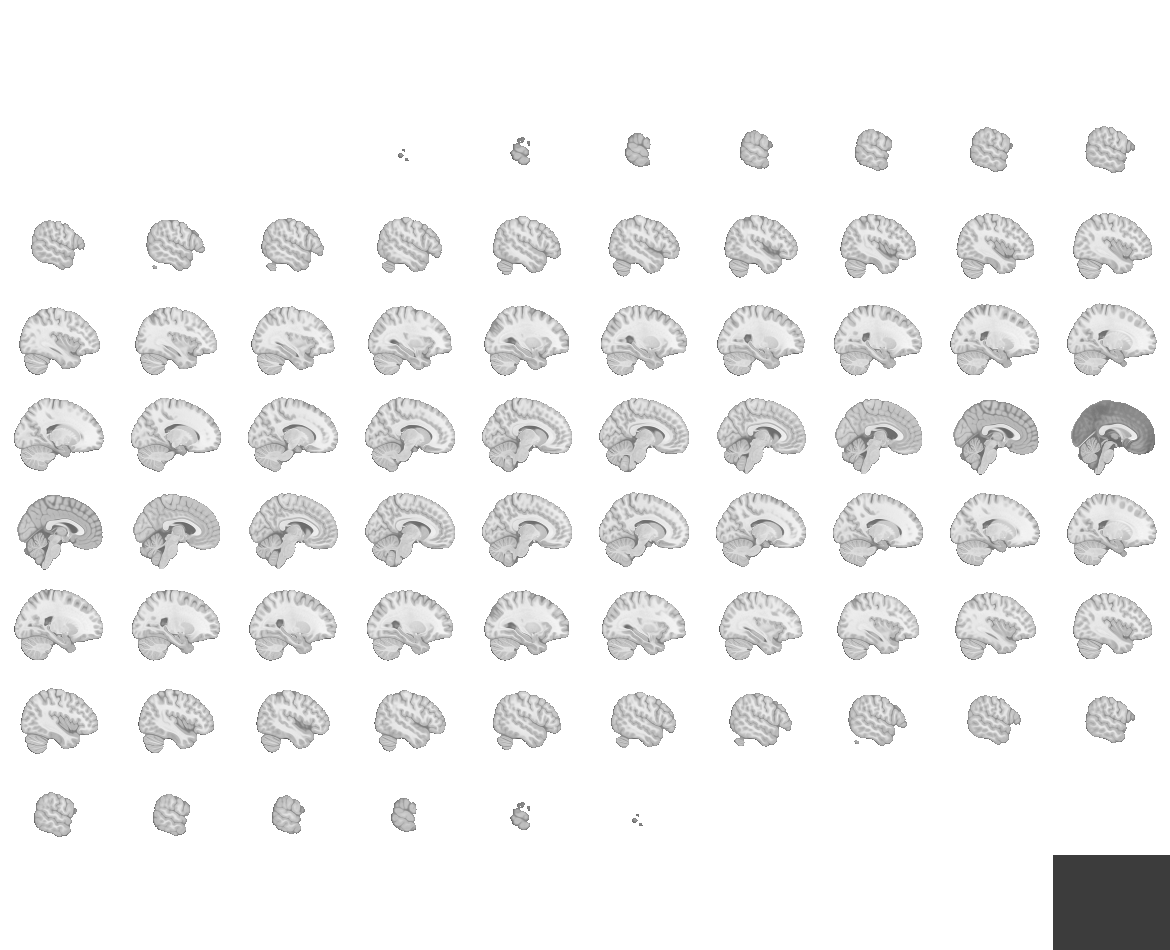
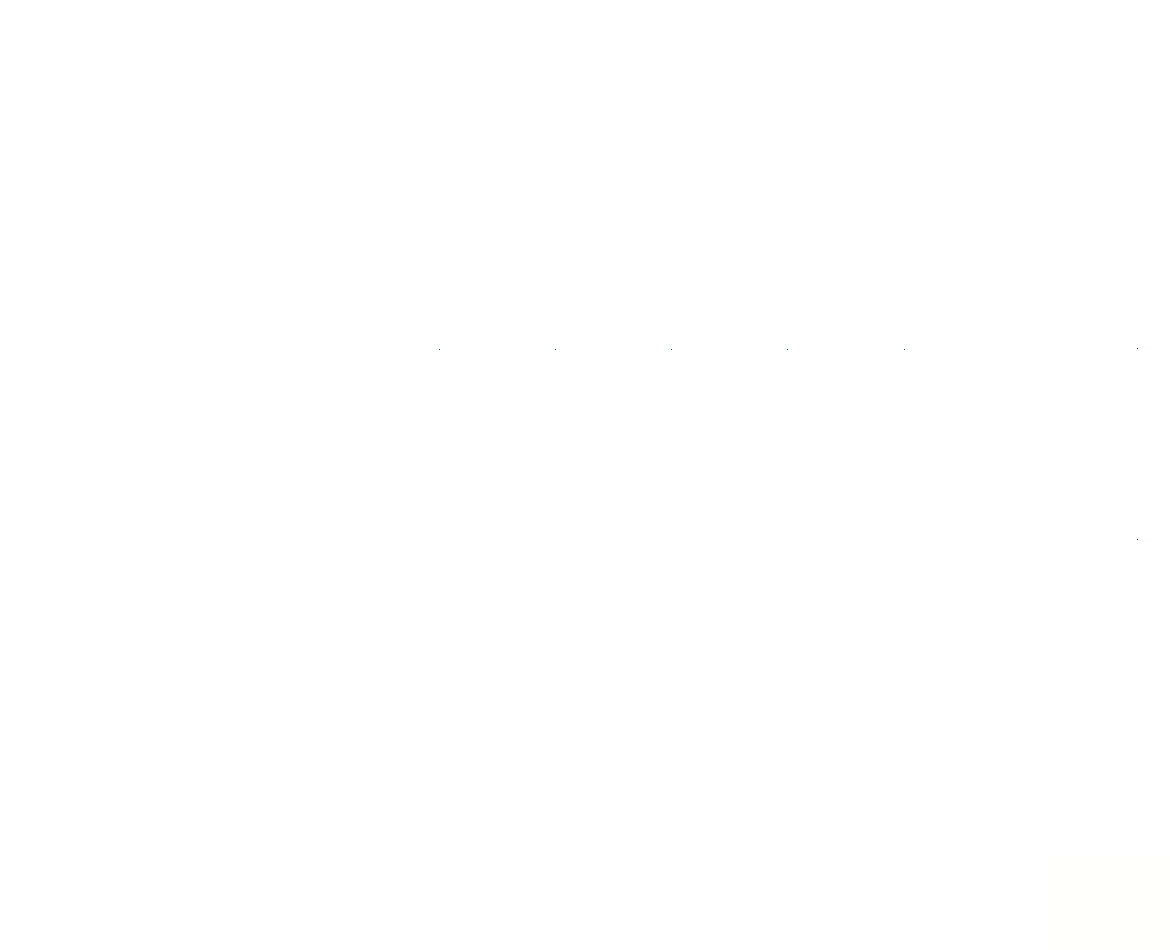

In [26]:
calvin_fwe.corrected_img

Visualize the P-Values (FWE Corrected) Used to Correct the Above


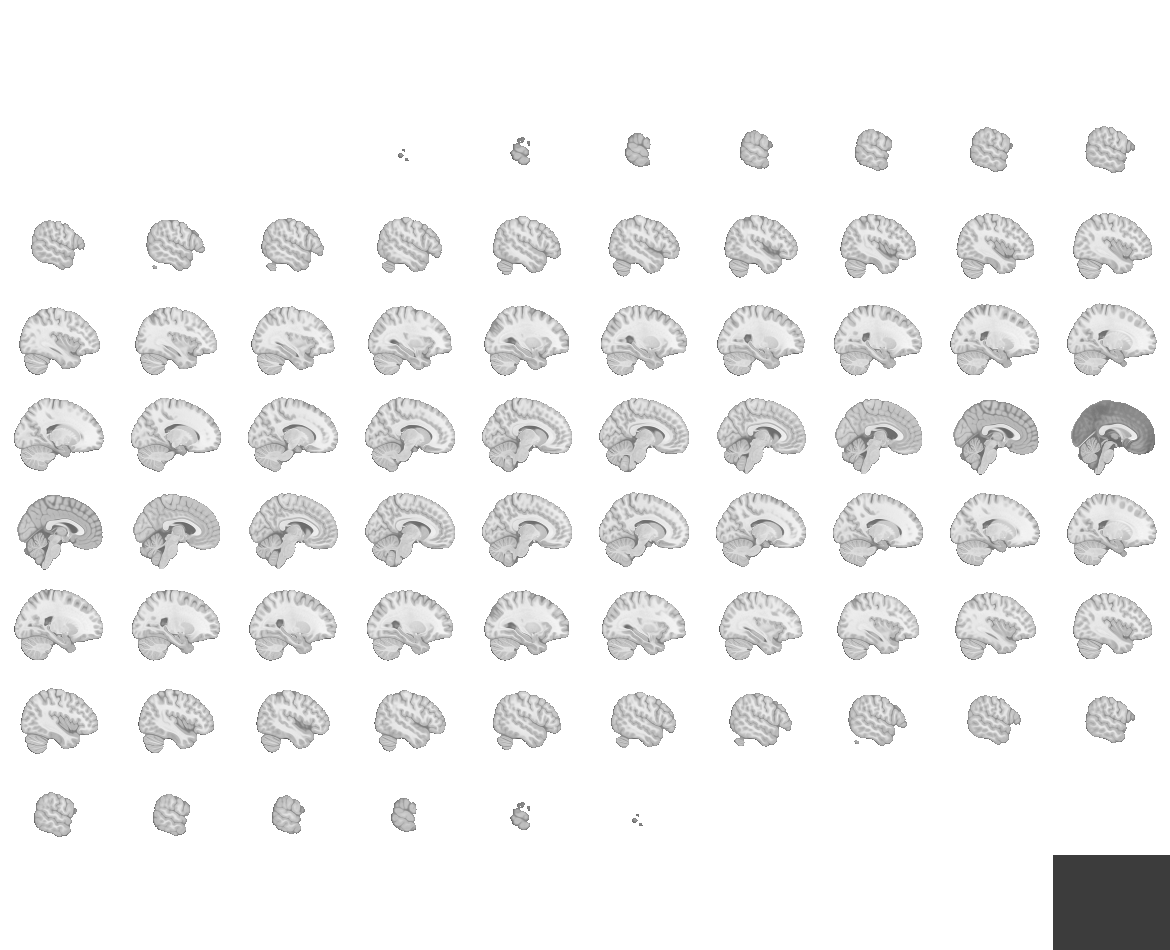
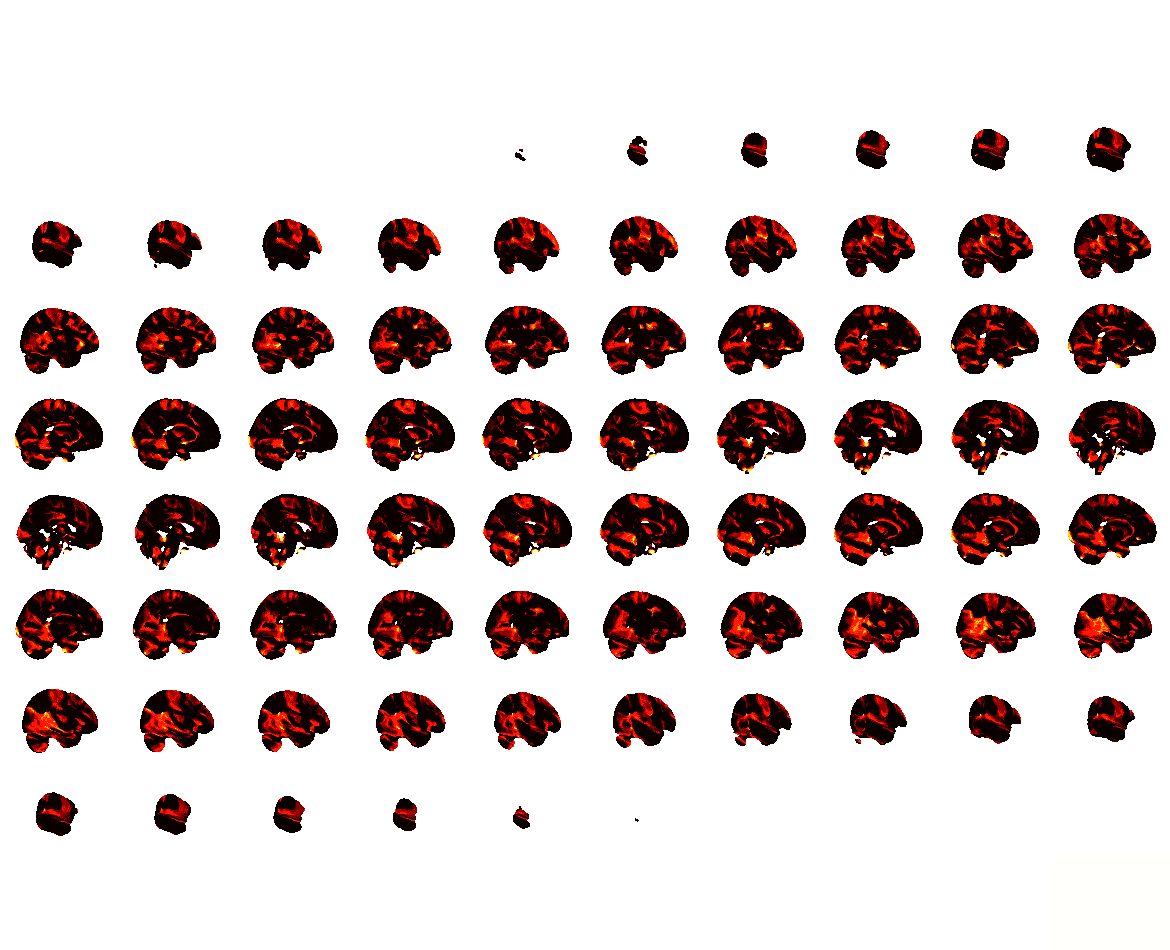

In [27]:
calvin_fwe.p_img

Visualize the Uncorrected Image


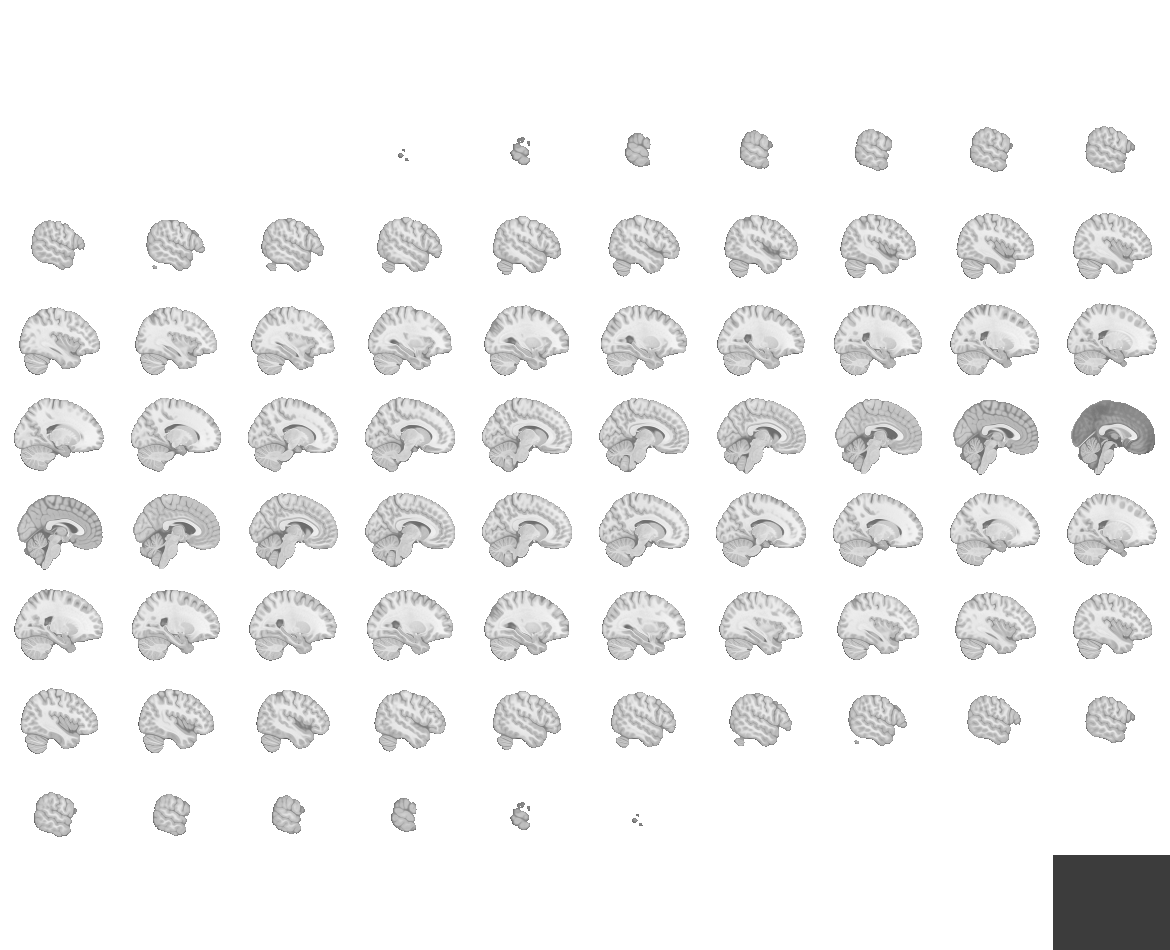
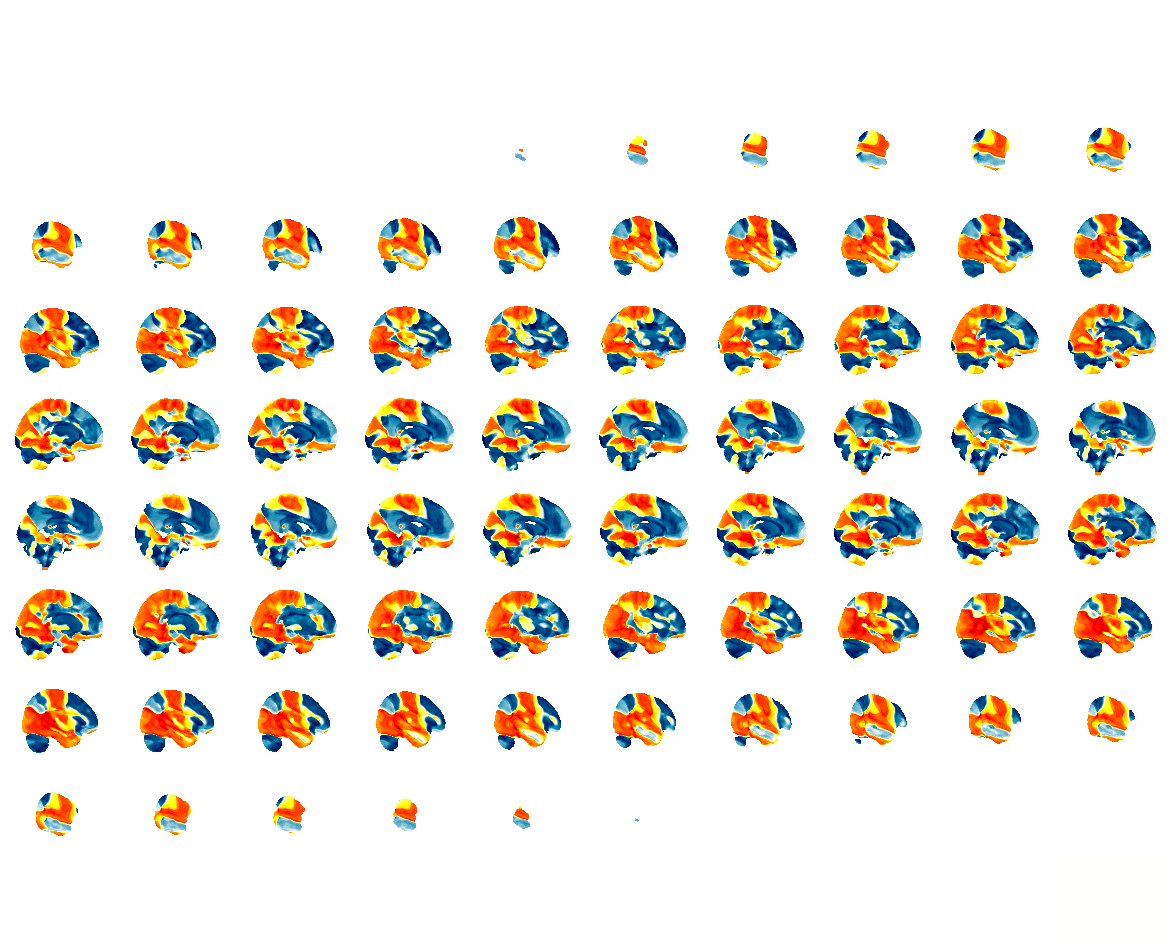

In [28]:
calvin_fwe.uncorrected_img